## Project: Decision Trees and Random Forest - Predicting Potential Customers
Marks: 30

Welcome to the project on classification using decision trees and random forests.
Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

    The customer interacts with the marketing front on social media or other online platforms.
    The customer browses the website/app and downloads the brochure
    The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.
Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

    Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
    Find the factors driving the lead conversion process
    Create a profile of the leads which are likely to convert

## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

Data Dictionary

    ID: ID of the lead

    age: Age of the lead

    current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'

    first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'

    profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)

    website_visits: How many times has a lead visited the website

    time_spent_on_website: Total time spent on the website

    page_views_per_visit: Average number of pages on the website viewed during the visits.

    last_activity: Last interaction between the lead and ExtraaLearn.
        Email Activity: Seeking details about the program through email, Representative shared information with a lead like a brochure of program, etc.
        Phone Activity: Had a Phone Conversation with a representative, Had a conversation over SMS with a representative, etc.
        Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc.

    print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

    print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.

    digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.

    educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

    referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.

    status: Flag indicating whether the lead was converted to a paid customer or not.



In [1]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
learn_train = pd.read_csv("/Users/srikar/wd/training/datascience/LoanDefault/training_data.csv")
learn_test = pd.read_csv("/Users/srikar/wd/training/datascience/LoanDefault/testing_data.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
dtr = learn_train.copy()
dte = learn_test.copy()

In [4]:
dtr.loc[dtr["Business"] == "0", "Business"] = "New"
dtr["Business"] = dtr["Business"].fillna('New')
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   105000 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [5]:
dte.loc[dte["Business"] == "0", "Business"] = "New"
dte["Business"] = dte["Business"].fillna('New')
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         45000 non-null  int64 
 1   Date_Of_Disbursement       44892 non-null  object
 2   Business                   45000 non-null  object
 3   Jobs_Reatained             45000 non-null  int64 
 4   Jobs_Created               45000 non-null  int64 
 5   Year_Of_Commitment         45000 non-null  object
 6   Guaranteed_Approved _Loan  45000 non-null  object
 7   Borrower_Name              44998 non-null  object
 8   Low_Documentation_Loan     44867 non-null  object
 9   Demography                 45000 non-null  object
 10  State_Of_Bank              45000 non-null  object
 11  ChargedOff_Amount          45000 non-null  object
 12  Borrower_City              45000 non-null  object
 13  Borrower_State             44951 non-null  object
 14  Gross_

In [6]:
dtr["YOC"] = dtr.iloc[:, 5]
dtr.loc[dtr["YOC"] == "1976A", "YOC"] = "1976"
dtr["YOC"].tail(50)
dtr["YOC"] = dtr["YOC"].astype(float)
dtr.drop(dtr.iloc[:, 5:6], axis=1, inplace=True)
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         105000 non-null  int64  
 1   Date_Of_Disbursement       104765 non-null  object 
 2   Business                   105000 non-null  object 
 3   Jobs_Reatained             105000 non-null  int64  
 4   Jobs_Created               105000 non-null  int64  
 5   Guaranteed_Approved _Loan  105000 non-null  object 
 6   Borrower_Name              104997 non-null  object 
 7   Low_Documentation_Loan     104633 non-null  object 
 8   Demography                 105000 non-null  object 
 9   State_Of_Bank              105000 non-null  object 
 10  ChargedOff_Amount          105000 non-null  object 
 11  Borrower_City              105000 non-null  object 
 12  Borrower_State             105000 non-null  object 
 13  Gross_Amount_Balance       10

In [7]:
dte["YOC"] = dte.iloc[:, 5]
dte.loc[dte["YOC"] == "1976A", "YOC"] = "1976"
dte["YOC"].unique()
dte["YOC"] = dte["YOC"].astype(float)
dte.drop(dte.iloc[:, 5:6], axis=1, inplace=True)
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         45000 non-null  int64  
 1   Date_Of_Disbursement       44892 non-null  object 
 2   Business                   45000 non-null  object 
 3   Jobs_Reatained             45000 non-null  int64  
 4   Jobs_Created               45000 non-null  int64  
 5   Guaranteed_Approved _Loan  45000 non-null  object 
 6   Borrower_Name              44998 non-null  object 
 7   Low_Documentation_Loan     44867 non-null  object 
 8   Demography                 45000 non-null  object 
 9   State_Of_Bank              45000 non-null  object 
 10  ChargedOff_Amount          45000 non-null  object 
 11  Borrower_City              45000 non-null  object 
 12  Borrower_State             44951 non-null  object 
 13  Gross_Amount_Balance       45000 non-null  obj

In [8]:
#Jobs_Created
dtr["Jobs_Cre"] = dtr.iloc[:, 4]
dtr.drop(dtr.iloc[:, 4:5], axis=1, inplace=True)
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         105000 non-null  int64  
 1   Date_Of_Disbursement       104765 non-null  object 
 2   Business                   105000 non-null  object 
 3   Jobs_Reatained             105000 non-null  int64  
 4   Guaranteed_Approved _Loan  105000 non-null  object 
 5   Borrower_Name              104997 non-null  object 
 6   Low_Documentation_Loan     104633 non-null  object 
 7   Demography                 105000 non-null  object 
 8   State_Of_Bank              105000 non-null  object 
 9   ChargedOff_Amount          105000 non-null  object 
 10  Borrower_City              105000 non-null  object 
 11  Borrower_State             105000 non-null  object 
 12  Gross_Amount_Balance       105000 non-null  object 
 13  Count_Employees            10

In [9]:
#Jobs_Created
dte["Jobs_Cre"] = dte.iloc[:, 4]
dte.drop(dte.iloc[:, 4:5], axis=1, inplace=True)
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         45000 non-null  int64  
 1   Date_Of_Disbursement       44892 non-null  object 
 2   Business                   45000 non-null  object 
 3   Jobs_Reatained             45000 non-null  int64  
 4   Guaranteed_Approved _Loan  45000 non-null  object 
 5   Borrower_Name              44998 non-null  object 
 6   Low_Documentation_Loan     44867 non-null  object 
 7   Demography                 45000 non-null  object 
 8   State_Of_Bank              45000 non-null  object 
 9   ChargedOff_Amount          45000 non-null  object 
 10  Borrower_City              45000 non-null  object 
 11  Borrower_State             44951 non-null  object 
 12  Gross_Amount_Balance       45000 non-null  object 
 13  Count_Employees            45000 non-null  int

In [10]:
#Borrower_Name
dtr["Borrower"] = dtr.iloc[:, 5]
dtr.drop(dtr.iloc[:, 5:6], axis=1, inplace=True)
dtr["Borrower"] = dtr["Borrower"].fillna('Srikar Corp')

dtr["Low_Documentation_Loan"] = dtr["Low_Documentation_Loan"].fillna('No')
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         105000 non-null  int64  
 1   Date_Of_Disbursement       104765 non-null  object 
 2   Business                   105000 non-null  object 
 3   Jobs_Reatained             105000 non-null  int64  
 4   Guaranteed_Approved _Loan  105000 non-null  object 
 5   Low_Documentation_Loan     105000 non-null  object 
 6   Demography                 105000 non-null  object 
 7   State_Of_Bank              105000 non-null  object 
 8   ChargedOff_Amount          105000 non-null  object 
 9   Borrower_City              105000 non-null  object 
 10  Borrower_State             105000 non-null  object 
 11  Gross_Amount_Balance       105000 non-null  object 
 12  Count_Employees            105000 non-null  int64  
 13  Classification_Code        10

In [11]:
#Borrower_Name
dte["Borrower"] = dte.iloc[:, 5]
dte.drop(dte.iloc[:, 5:6], axis=1, inplace=True)
dte["Borrower"] = dte["Borrower"].fillna('Srikar Corp')

dte["Low_Documentation_Loan"] = dte["Low_Documentation_Loan"].fillna('No')
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         45000 non-null  int64  
 1   Date_Of_Disbursement       44892 non-null  object 
 2   Business                   45000 non-null  object 
 3   Jobs_Reatained             45000 non-null  int64  
 4   Guaranteed_Approved _Loan  45000 non-null  object 
 5   Low_Documentation_Loan     45000 non-null  object 
 6   Demography                 45000 non-null  object 
 7   State_Of_Bank              45000 non-null  object 
 8   ChargedOff_Amount          45000 non-null  object 
 9   Borrower_City              45000 non-null  object 
 10  Borrower_State             44951 non-null  object 
 11  Gross_Amount_Balance       45000 non-null  object 
 12  Count_Employees            45000 non-null  int64  
 13  Classification_Code        45000 non-null  int

In [12]:
dtr["ChargedOff_Amount"] = dtr.iloc[:, 8]
dtr.drop(dtr.iloc[:, 8:9], axis=1, inplace=True)
dtr["ChargedOff_Amount"] = dtr["ChargedOff_Amount"].str.lstrip('Rs.')
dtr["ChargedOff_Amount"] = dtr["ChargedOff_Amount"].astype(float)
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         105000 non-null  int64  
 1   Date_Of_Disbursement       104765 non-null  object 
 2   Business                   105000 non-null  object 
 3   Jobs_Reatained             105000 non-null  int64  
 4   Guaranteed_Approved _Loan  105000 non-null  object 
 5   Low_Documentation_Loan     105000 non-null  object 
 6   Demography                 105000 non-null  object 
 7   State_Of_Bank              105000 non-null  object 
 8   Borrower_City              105000 non-null  object 
 9   Borrower_State             105000 non-null  object 
 10  Gross_Amount_Balance       105000 non-null  object 
 11  Count_Employees            105000 non-null  int64  
 12  Classification_Code        105000 non-null  int64  
 13  Loan_Approved_Gross        10

In [13]:
dte["ChargedOff_Amount"] = dte.iloc[:, 8]
dte.drop(dte.iloc[:, 8:9], axis=1, inplace=True)
dte["ChargedOff_Amount"] = dte["ChargedOff_Amount"].str.lstrip('Rs.')
dte["ChargedOff_Amount"] = dte["ChargedOff_Amount"].astype(float)
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         45000 non-null  int64  
 1   Date_Of_Disbursement       44892 non-null  object 
 2   Business                   45000 non-null  object 
 3   Jobs_Reatained             45000 non-null  int64  
 4   Guaranteed_Approved _Loan  45000 non-null  object 
 5   Low_Documentation_Loan     45000 non-null  object 
 6   Demography                 45000 non-null  object 
 7   State_Of_Bank              45000 non-null  object 
 8   Borrower_City              45000 non-null  object 
 9   Borrower_State             44951 non-null  object 
 10  Gross_Amount_Balance       45000 non-null  object 
 11  Count_Employees            45000 non-null  int64  
 12  Classification_Code        45000 non-null  int64  
 13  Loan_Approved_Gross        45000 non-null  obj

In [14]:
dtr["Gross_Amount_Balance"] = dtr["Gross_Amount_Balance"].str.lstrip('Rs.')
dtr["Gross_Amount_Balance"] = dtr["Gross_Amount_Balance"].astype(float)
##

dtr["Classification_Code"] = dtr.iloc[:, 12]
dtr.drop(dtr.iloc[:, 12:13], axis=1, inplace=True)
##

dtr["Loan_Approved_Gross"] = dtr["Loan_Approved_Gross"].str.lstrip('Rs.')
dtr["Loan_Approved_Gross"] = dtr["Loan_Approved_Gross"].astype(float)
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         105000 non-null  int64  
 1   Date_Of_Disbursement       104765 non-null  object 
 2   Business                   105000 non-null  object 
 3   Jobs_Reatained             105000 non-null  int64  
 4   Guaranteed_Approved _Loan  105000 non-null  object 
 5   Low_Documentation_Loan     105000 non-null  object 
 6   Demography                 105000 non-null  object 
 7   State_Of_Bank              105000 non-null  object 
 8   Borrower_City              105000 non-null  object 
 9   Borrower_State             105000 non-null  object 
 10  Gross_Amount_Balance       105000 non-null  float64
 11  Count_Employees            105000 non-null  int64  
 12  Loan_Approved_Gross        105000 non-null  float64
 13  Gross_Amount_Disbursed     10

In [15]:
dte["Gross_Amount_Balance"] = dte["Gross_Amount_Balance"].str.lstrip('Rs.')
dte["Gross_Amount_Balance"] = dte["Gross_Amount_Balance"].astype(float)
##

dte["Classification_Code"] = dte.iloc[:, 12]
dte.drop(dte.iloc[:, 12:13], axis=1, inplace=True)
##

dte["Loan_Approved_Gross"] = dte["Loan_Approved_Gross"].str.lstrip('Rs.')
dte["Loan_Approved_Gross"] = dte["Loan_Approved_Gross"].astype(float)
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         45000 non-null  int64  
 1   Date_Of_Disbursement       44892 non-null  object 
 2   Business                   45000 non-null  object 
 3   Jobs_Reatained             45000 non-null  int64  
 4   Guaranteed_Approved _Loan  45000 non-null  object 
 5   Low_Documentation_Loan     45000 non-null  object 
 6   Demography                 45000 non-null  object 
 7   State_Of_Bank              45000 non-null  object 
 8   Borrower_City              45000 non-null  object 
 9   Borrower_State             44951 non-null  object 
 10  Gross_Amount_Balance       45000 non-null  float64
 11  Count_Employees            45000 non-null  int64  
 12  Loan_Approved_Gross        45000 non-null  float64
 13  Gross_Amount_Disbursed     45000 non-null  obj

In [16]:
dtr["Gross_Amount_Disbursed"] = dtr.iloc[:, 13]
dtr.drop(dtr.iloc[:, 13:14], axis=1, inplace=True)
dtr["Gross_Amount_Disbursed"] = dtr["Gross_Amount_Disbursed"].str.lstrip('Rs.')
dtr["Gross_Amount_Disbursed"] = dtr["Gross_Amount_Disbursed"].astype(float)
dtr = dtr.replace({'Revolving_Credit_Line' : {'T' : 'No', 'C' : 'No', 'R' : 'No', '0' : 'No', '1' : 'No', '2' : 'No', '4' : 'No', '`' : 'No', '.' : 'No'}}) 

In [17]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         105000 non-null  int64  
 1   Date_Of_Disbursement       104765 non-null  object 
 2   Business                   105000 non-null  object 
 3   Jobs_Reatained             105000 non-null  int64  
 4   Guaranteed_Approved _Loan  105000 non-null  object 
 5   Low_Documentation_Loan     105000 non-null  object 
 6   Demography                 105000 non-null  object 
 7   State_Of_Bank              105000 non-null  object 
 8   Borrower_City              105000 non-null  object 
 9   Borrower_State             105000 non-null  object 
 10  Gross_Amount_Balance       105000 non-null  float64
 11  Count_Employees            105000 non-null  int64  
 12  Loan_Approved_Gross        105000 non-null  float64
 13  Loan_Term                  10

In [18]:
dte["Gross_Amount_Disbursed"] = dte.iloc[:, 13]
dte.drop(dte.iloc[:, 13:14], axis=1, inplace=True)
dte["Gross_Amount_Disbursed"] = dte["Gross_Amount_Disbursed"].str.lstrip('Rs.')
dte["Gross_Amount_Disbursed"] = dte["Gross_Amount_Disbursed"].astype(float)
dte = dte.replace({'Revolving_Credit_Line' : {'T' : 'No', 'C' : 'No', 'R' : 'No', '0' : 'No', '1' : 'No', '2' : 'No', '4' : 'No', '`' : 'No', '.' : 'No'}})
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         45000 non-null  int64  
 1   Date_Of_Disbursement       44892 non-null  object 
 2   Business                   45000 non-null  object 
 3   Jobs_Reatained             45000 non-null  int64  
 4   Guaranteed_Approved _Loan  45000 non-null  object 
 5   Low_Documentation_Loan     45000 non-null  object 
 6   Demography                 45000 non-null  object 
 7   State_Of_Bank              45000 non-null  object 
 8   Borrower_City              45000 non-null  object 
 9   Borrower_State             44951 non-null  object 
 10  Gross_Amount_Balance       45000 non-null  float64
 11  Count_Employees            45000 non-null  int64  
 12  Loan_Approved_Gross        45000 non-null  float64
 13  Loan_Term                  45000 non-null  int

In [19]:
dtr.drop(["ID"], axis=1, inplace=True)
dtr.drop(["Primary_Loan_Digit"], axis=1, inplace=True)

In [20]:
##df.info()
dte.drop(["ID"], axis=1, inplace=True)
dte.drop(["Primary_Loan_Digit"], axis=1, inplace=True)

In [21]:
dtr["Revolving_Credit_Line"] = dtr["Revolving_Credit_Line"].fillna('No')
##
dtr["Guaranteed_Approved _Loan"] = dtr["Guaranteed_Approved _Loan"].str.lstrip('Rs.')
dtr["Guaranteed_Approved_Loan"] = dtr["Guaranteed_Approved _Loan"].astype(float)
dtr.drop(dtr.iloc[:, 4:5], axis=1, inplace=True)
dtr.drop(["Borrower"], axis=1, inplace=True)
dtr.drop(["Guaranteed_Approved_Loan"], axis=1, inplace=True)
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date_Of_Disbursement       104765 non-null  object 
 1   Business                   105000 non-null  object 
 2   Jobs_Reatained             105000 non-null  int64  
 3   Guaranteed_Approved _Loan  105000 non-null  object 
 4   Demography                 105000 non-null  object 
 5   State_Of_Bank              105000 non-null  object 
 6   Borrower_City              105000 non-null  object 
 7   Borrower_State             105000 non-null  object 
 8   Gross_Amount_Balance       105000 non-null  float64
 9   Count_Employees            105000 non-null  int64  
 10  Loan_Approved_Gross        105000 non-null  float64
 11  Loan_Term                  105000 non-null  int64  
 12  Commitment_Date            105000 non-null  object 
 13  Code_Franchise             10

In [22]:
dte["Revolving_Credit_Line"] = dte["Revolving_Credit_Line"].fillna('No')
##
dte["Guaranteed_Approved _Loan"] = dte["Guaranteed_Approved _Loan"].str.lstrip('Rs.')
dte["Guaranteed_Approved_Loan"] = dte["Guaranteed_Approved _Loan"].astype(float)
dte.drop(dte.iloc[:, 4:5], axis=1, inplace=True)
dte.drop(["Borrower"], axis=1, inplace=True)
dte.drop(["Guaranteed_Approved_Loan"], axis=1, inplace=True)
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date_Of_Disbursement       44892 non-null  object 
 1   Business                   45000 non-null  object 
 2   Jobs_Reatained             45000 non-null  int64  
 3   Guaranteed_Approved _Loan  45000 non-null  object 
 4   Demography                 45000 non-null  object 
 5   State_Of_Bank              45000 non-null  object 
 6   Borrower_City              45000 non-null  object 
 7   Borrower_State             44951 non-null  object 
 8   Gross_Amount_Balance       45000 non-null  float64
 9   Count_Employees            45000 non-null  int64  
 10  Loan_Approved_Gross        45000 non-null  float64
 11  Loan_Term                  45000 non-null  int64  
 12  Commitment_Date            45000 non-null  object 
 13  Code_Franchise             45000 non-null  int

In [23]:
dtr.describe().T

,count,mean,std,min,25%,50%,75%,max
Jobs_Reatained,105000.0,1.268865e+01,2.705442e+02,0.0,0.0,1.0,4.00,8.800000e+03
Gross_Amount_Balance,105000.0,7.637843e+01,2.431197e+04,0.0,0.0,0.0,0.00,7.876682e+06
Count_Employees,105000.0,9.904248e+00,5.815706e+01,0.0,2.0,4.0,9.00,7.200000e+03
Loan_Approved_Gross,105000.0,1.492200e+07,2.262852e+07,81280.0,2600960.0,6502400.0,16906240.00,4.064000e+08
Loan_Term,105000.0,1.564384e+02,1.164127e+02,0.0,90.0,126.0,180.00,6.920000e+02
Code_Franchise,105000.0,2.707202e+03,1.266061e+04,0.0,0.0,1.0,1.00,9.200600e+04
Default,105000.0,2.771810e-01,4.476087e-01,0.0,0.0,0.0,1.00,1.000000e+00
YOC,105000.0,2.001460e+03,5.963933e+00,1969.0,1997.0,2003.0,2006.00,2.014000e+03
Jobs_Cre,105000.0,1.037925e+01,2.703408e+02,0.0,0.0,0.0,1.00,8.800000e+03
ChargedOff_Amount,105000.0,1.711913e+06,6.520106e+06,0.0,0.0,0.0,617016.80,1.625599e+08


In [24]:
dte.describe().T

,count,mean,std,min,25%,50%,75%,max
Jobs_Reatained,45000.0,1.142024e+01,2.490329e+02,0.0,0.0,1.0,4.00,8.800000e+03
Gross_Amount_Balance,45000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.00,0.000000e+00
Count_Employees,45000.0,1.032893e+01,9.748401e+01,0.0,2.0,4.0,9.00,8.999000e+03
Loan_Approved_Gross,45000.0,1.504715e+07,2.262118e+07,81280.0,2438400.0,6502400.0,17068800.00,3.724250e+08
Loan_Term,45000.0,1.558597e+02,1.162111e+02,0.0,88.0,126.0,180.00,7.580000e+02
Code_Franchise,45000.0,2.778932e+03,1.284372e+04,0.0,0.0,1.0,1.00,9.135000e+04
YOC,45000.0,2.001468e+03,5.948751e+00,1966.0,1997.0,2003.0,2006.00,2.014000e+03
Jobs_Cre,45000.0,8.985000e+00,2.489388e+02,0.0,0.0,0.0,1.00,8.800000e+03
ChargedOff_Amount,45000.0,1.782778e+06,7.022069e+06,0.0,0.0,0.0,645220.96,2.855038e+08
Classification_Code,45000.0,4.063311e+05,2.594592e+05,0.0,236115.0,447110.0,561790.00,9.281200e+05


In [25]:
dtr = dtr.replace({'Low_Documentation_Loan' : {'0' : 'No', 'S' : 'No', 'C' : 'No', 'A' : 'No', 'R' : 'No'}}) 

# Making a list of all categorical variables
cat_col = list(dtr.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(dtr[column].value_counts(normalize=True))
    print("-" * 50)

31-Jul-95    0.010605
30-Apr-95    0.010280
31-Jan-95    0.010156
31-Oct-94    0.009030
31-Mar-06    0.008801
               ...   
13-Dec-94    0.000010
11-Feb-80    0.000010
23-May-12    0.000010
14-Jan-81    0.000010
2-May-80     0.000010
Name: Date_Of_Disbursement, Length: 3505, dtype: float64
--------------------------------------------------
Existing    0.715152
New         0.284848
Name: Business, dtype: float64
--------------------------------------------------
2032000.0     0.061562
1016000.0     0.049324
406400.0      0.036381
4064000.0     0.030400
1422400.0     0.020505
                ...   
5257596.8     0.000010
16026384.0    0.000010
403148.8      0.000010
40388844.8    0.000010
59765184.0    0.000010
Name: Guaranteed_Approved _Loan, Length: 10138, dtype: float64
--------------------------------------------------
Urban        0.548552
Undefined    0.334276
Rural        0.117171
Name: Demography, dtype: float64
--------------------------------------------------
TR    0.1

In [26]:
dte = dte.replace({'Low_Documentation_Loan' : {'0' : 'No', 'S' : 'No', 'C' : 'No', 'A' : 'No', 'R' : 'No'}}) 

# Making a list of all categorical variables
cat_col = list(dte.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(dte[column].value_counts(normalize=True))
    print("-" * 50)

30-Apr-95    0.010314
31-Jul-95    0.010158
31-Mar-06    0.008866
31-Oct-94    0.008866
31-Aug-07    0.008843
               ...   
27-Aug-97    0.000022
28-Mar-02    0.000022
28-Apr-00    0.000022
5-May-82     0.000022
9-Aug-02     0.000022
Name: Date_Of_Disbursement, Length: 2139, dtype: float64
--------------------------------------------------
Existing    0.712489
New         0.287511
Name: Business, dtype: float64
--------------------------------------------------
2032000.0     0.061511
1016000.0     0.048444
406400.0      0.036867
4064000.0     0.030311
812800.0      0.020644
                ...   
13027558.4    0.000022
6708038.4     0.000022
33905952.0    0.000022
4722368.0     0.000022
29657040.0    0.000022
Name: Guaranteed_Approved _Loan, Length: 6151, dtype: float64
--------------------------------------------------
Urban        0.546356
Undefined    0.333778
Rural        0.119867
Name: Demography, dtype: float64
--------------------------------------------------
TR    0.14

In [27]:
dtr["Date_Of_Disbursement"] = dtr["Date_Of_Disbursement"].fillna('01-Jan-01')
dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date_Of_Disbursement       105000 non-null  object 
 1   Business                   105000 non-null  object 
 2   Jobs_Reatained             105000 non-null  int64  
 3   Guaranteed_Approved _Loan  105000 non-null  object 
 4   Demography                 105000 non-null  object 
 5   State_Of_Bank              105000 non-null  object 
 6   Borrower_City              105000 non-null  object 
 7   Borrower_State             105000 non-null  object 
 8   Gross_Amount_Balance       105000 non-null  float64
 9   Count_Employees            105000 non-null  int64  
 10  Loan_Approved_Gross        105000 non-null  float64
 11  Loan_Term                  105000 non-null  int64  
 12  Commitment_Date            105000 non-null  object 
 13  Code_Franchise             10

In [28]:
dte["Borrower_State"] = dte["Borrower_State"].fillna('Maharashtra')
dte["Date_Of_Disbursement"] = dte["Date_Of_Disbursement"].fillna('01-Jan-01')
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date_Of_Disbursement       45000 non-null  object 
 1   Business                   45000 non-null  object 
 2   Jobs_Reatained             45000 non-null  int64  
 3   Guaranteed_Approved _Loan  45000 non-null  object 
 4   Demography                 45000 non-null  object 
 5   State_Of_Bank              45000 non-null  object 
 6   Borrower_City              45000 non-null  object 
 7   Borrower_State             45000 non-null  object 
 8   Gross_Amount_Balance       45000 non-null  float64
 9   Count_Employees            45000 non-null  int64  
 10  Loan_Approved_Gross        45000 non-null  float64
 11  Loan_Term                  45000 non-null  int64  
 12  Commitment_Date            45000 non-null  object 
 13  Code_Franchise             45000 non-null  int

In [29]:
#test_dtr = dtr.copy()
# X=test_dtr.drop(columns='Default')
# Y=dtr['Default']
# X.info()
#Y.head(50)

In [30]:
#Separating target variable and other variables
X=dtr.drop(columns='Default')
Y=dtr['Default']


#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [31]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (73500, 22782)
Shape of test set :  (31500, 22782)
Percentage of classes in training set:
0    0.723374
1    0.276626
Name: Default, dtype: float64
Percentage of classes in test set:
0    0.721524
1    0.278476
Name: Default, dtype: float64


In [32]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Defaulted', 'Not Defaulted'], yticklabels=['Defaulted', 'Not Defaulted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [33]:
#Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53168
           1       1.00      1.00      1.00     20332

    accuracy                           1.00     73500
   macro avg       1.00      1.00      1.00     73500
weighted avg       1.00      1.00      1.00     73500



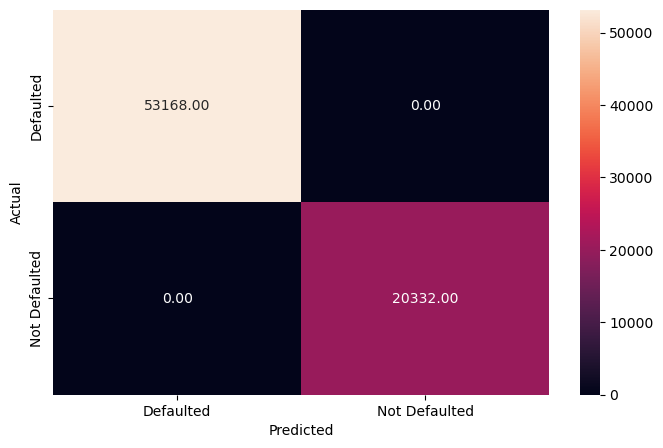

In [34]:
#Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22728
           1       0.98      0.99      0.98      8772

    accuracy                           0.99     31500
   macro avg       0.99      0.99      0.99     31500
weighted avg       0.99      0.99      0.99     31500



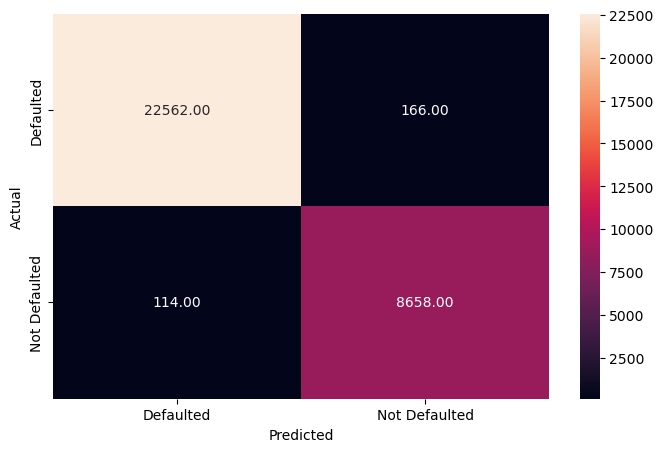

In [35]:
#Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

In [ ]:
#Separating target variable and other variables
X_dte=dte.drop(columns='Default')
Y=dtr['Default']


#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X_dte = pd.get_dummies(X_dte, drop_first=True)

#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [40]:
#Checking performance on the testing data
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X_dte = pd.get_dummies(dte, drop_first=True)
y_pred_dte = d_tree.predict(X_dte)
#dte.info()

ValueError: X has 16482 features, but DecisionTreeClassifier is expecting 22782 features as input.

In [44]:
X_dte.info()
X_dte.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Columns: 16482 entries, Jobs_Reatained to Revolving_Credit_Line_Yes
dtypes: float64(5), int64(6), uint8(16471)
memory usage: 710.6 MB


(45000, 16482)

In [48]:
dte.shape

(45000, 21)

In [45]:
X_train.info()
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73500 entries, 61274 to 98539
Columns: 22782 entries, Jobs_Reatained to Revolving_Credit_Line_Yes
dtypes: float64(5), int64(6), uint8(22771)
memory usage: 1.6 GB


(73500, 22782)

In [49]:
X_train.shape

(73500, 22782)

In [20]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (73500, 12645)
Shape of test set :  (31500, 12645)
Percentage of classes in training set:
0    0.723374
1    0.276626
Name: Default, dtype: float64
Percentage of classes in test set:
0    0.721524
1    0.278476
Name: Default, dtype: float64


In [21]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Defaulted', 'Not Defaulted'], yticklabels=['Defaulted', 'Not Defaulted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [22]:
#Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53168
           1       1.00      1.00      1.00     20332

    accuracy                           1.00     73500
   macro avg       1.00      1.00      1.00     73500
weighted avg       1.00      1.00      1.00     73500



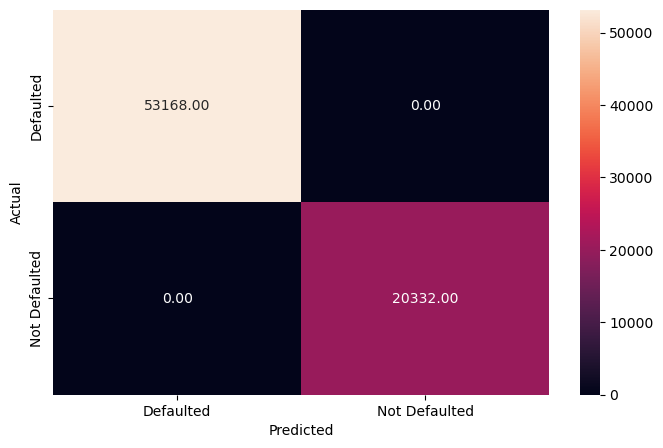

In [23]:
#Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22728
           1       0.98      0.99      0.98      8772

    accuracy                           0.99     31500
   macro avg       0.99      0.99      0.99     31500
weighted avg       0.99      0.99      0.99     31500



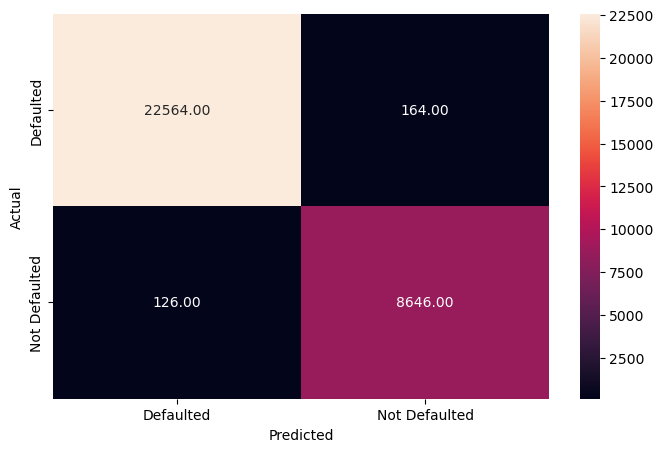

In [24]:
#Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

In [31]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0:0.3, 1:0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



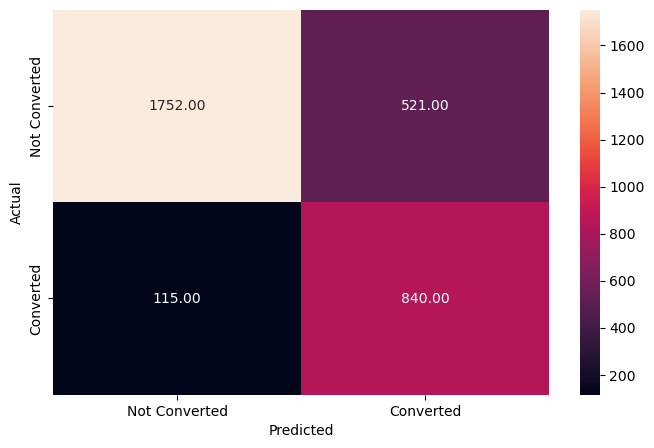

In [32]:
#Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



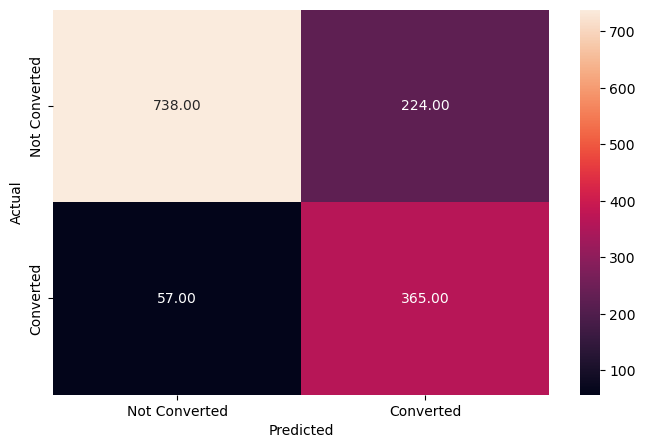

In [33]:
#Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

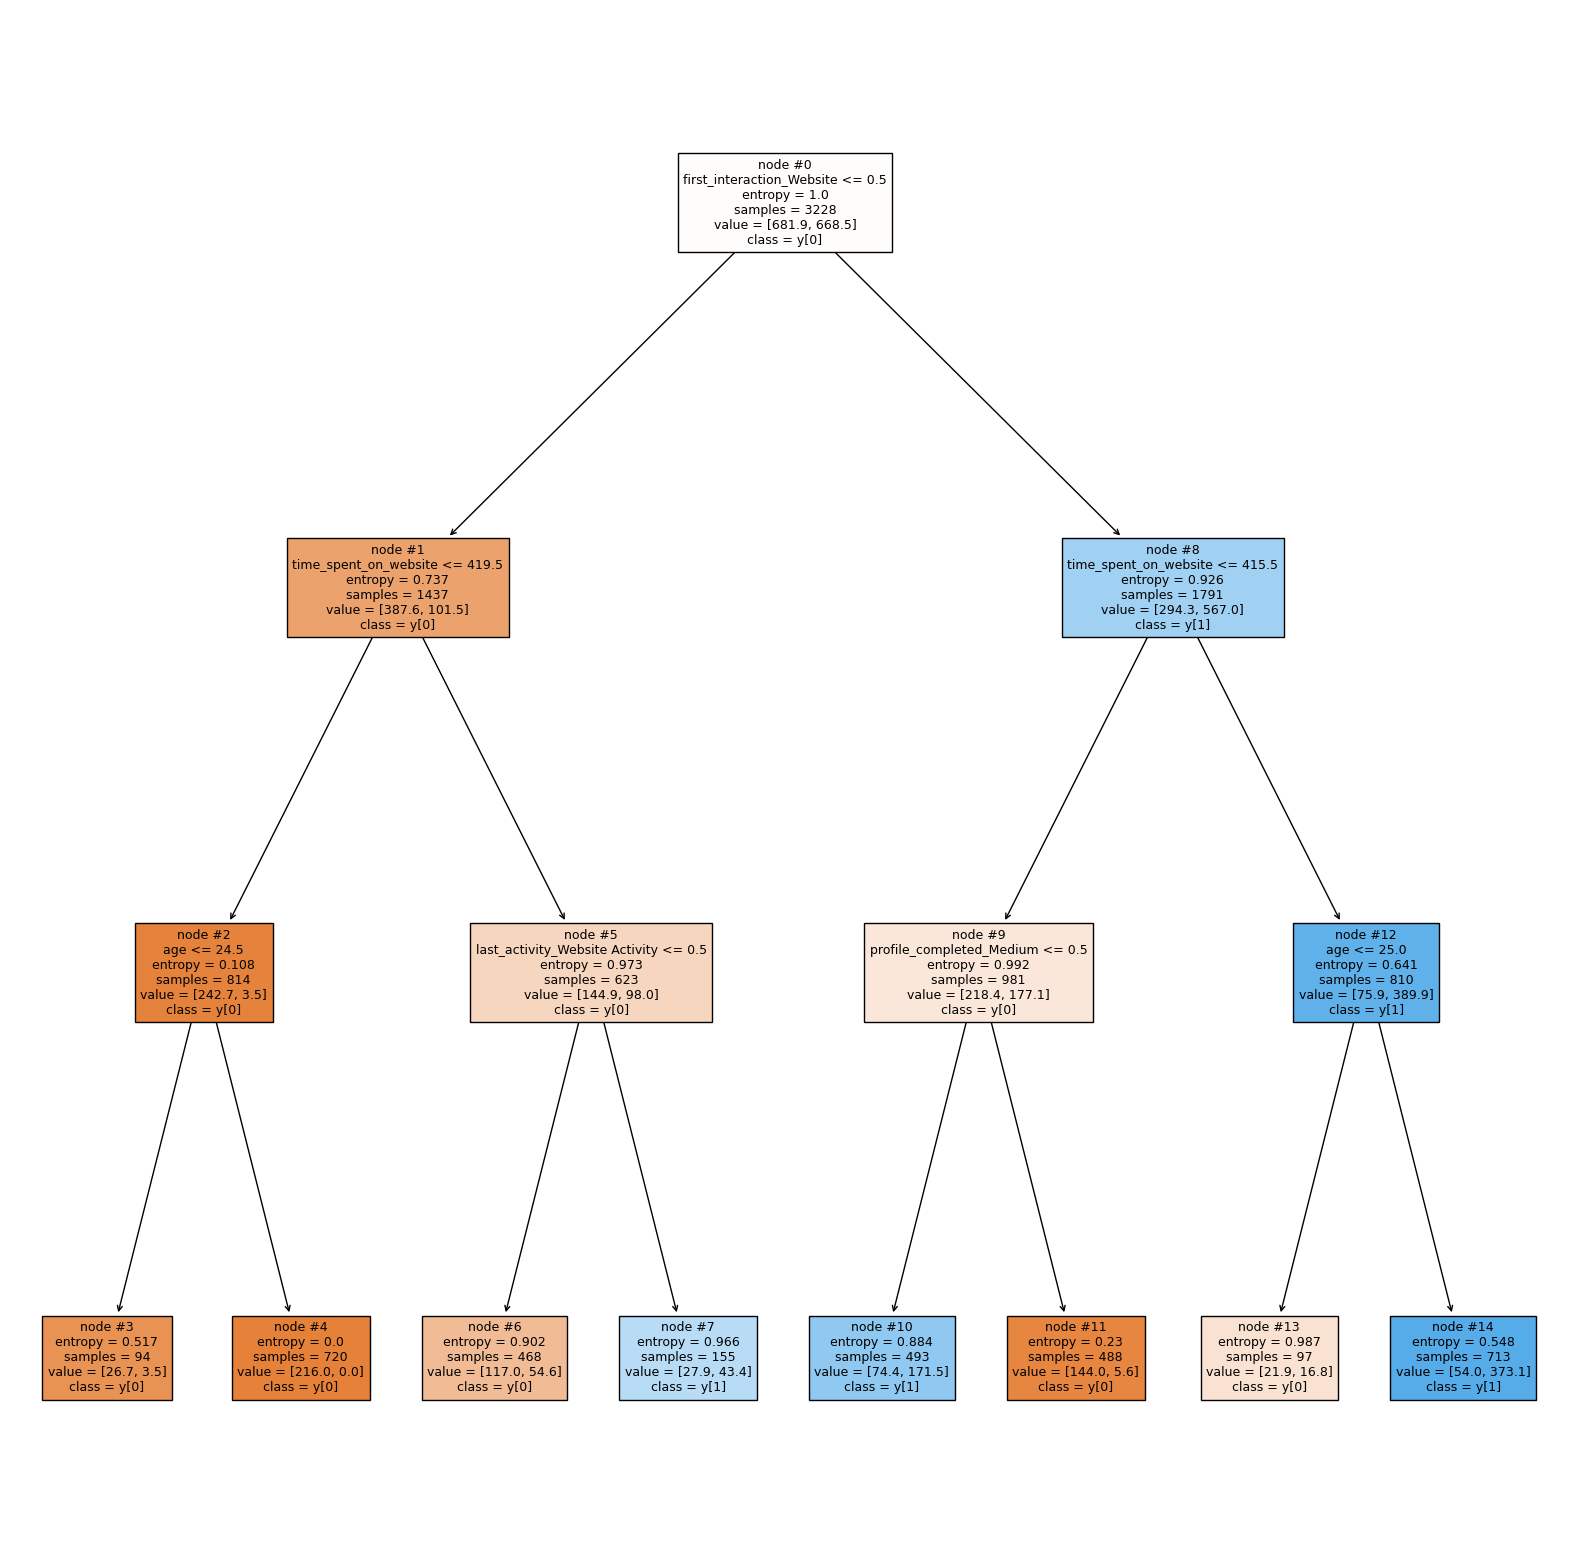

In [34]:
features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [35]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


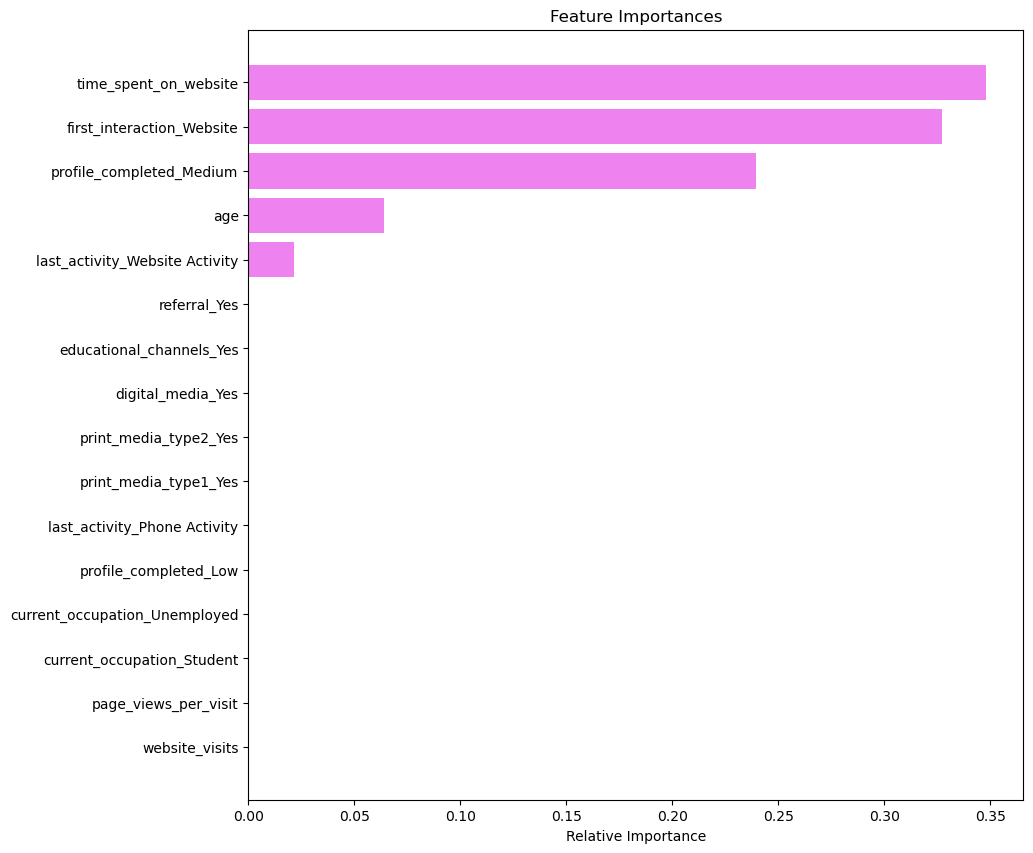

In [36]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random Forest Classifier

In [37]:
#Fitting the decision tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



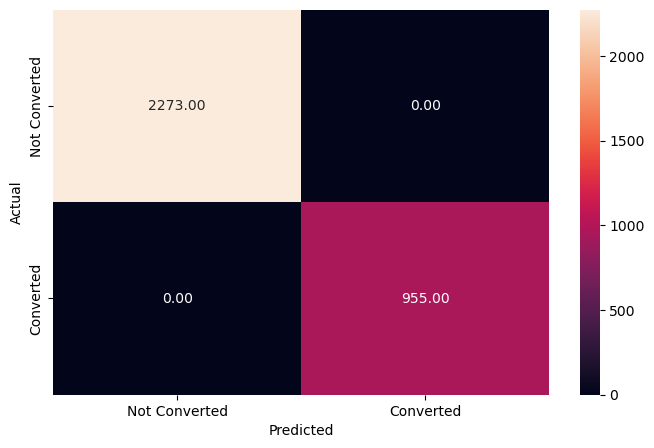

In [38]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.80      0.68      0.73       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.85      1384



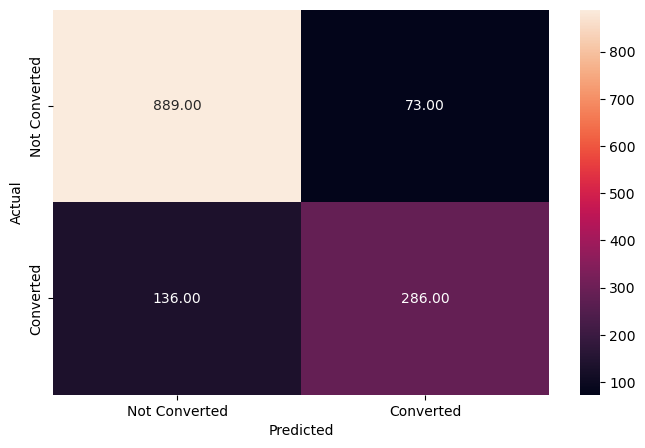

In [39]:
#Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [40]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_



#Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



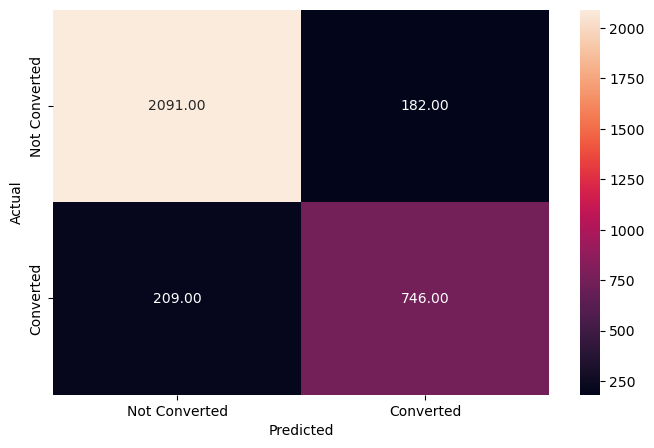

In [41]:
#Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

In [42]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0:0.7, 1:0.3}, "balanced", {0:0.4, 1:0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



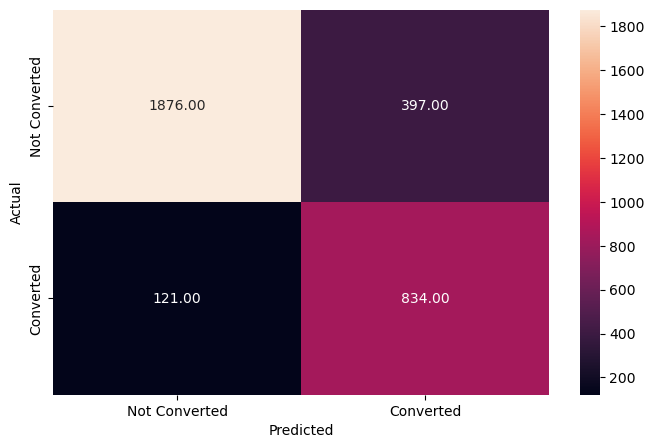

In [43]:
#Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train5)

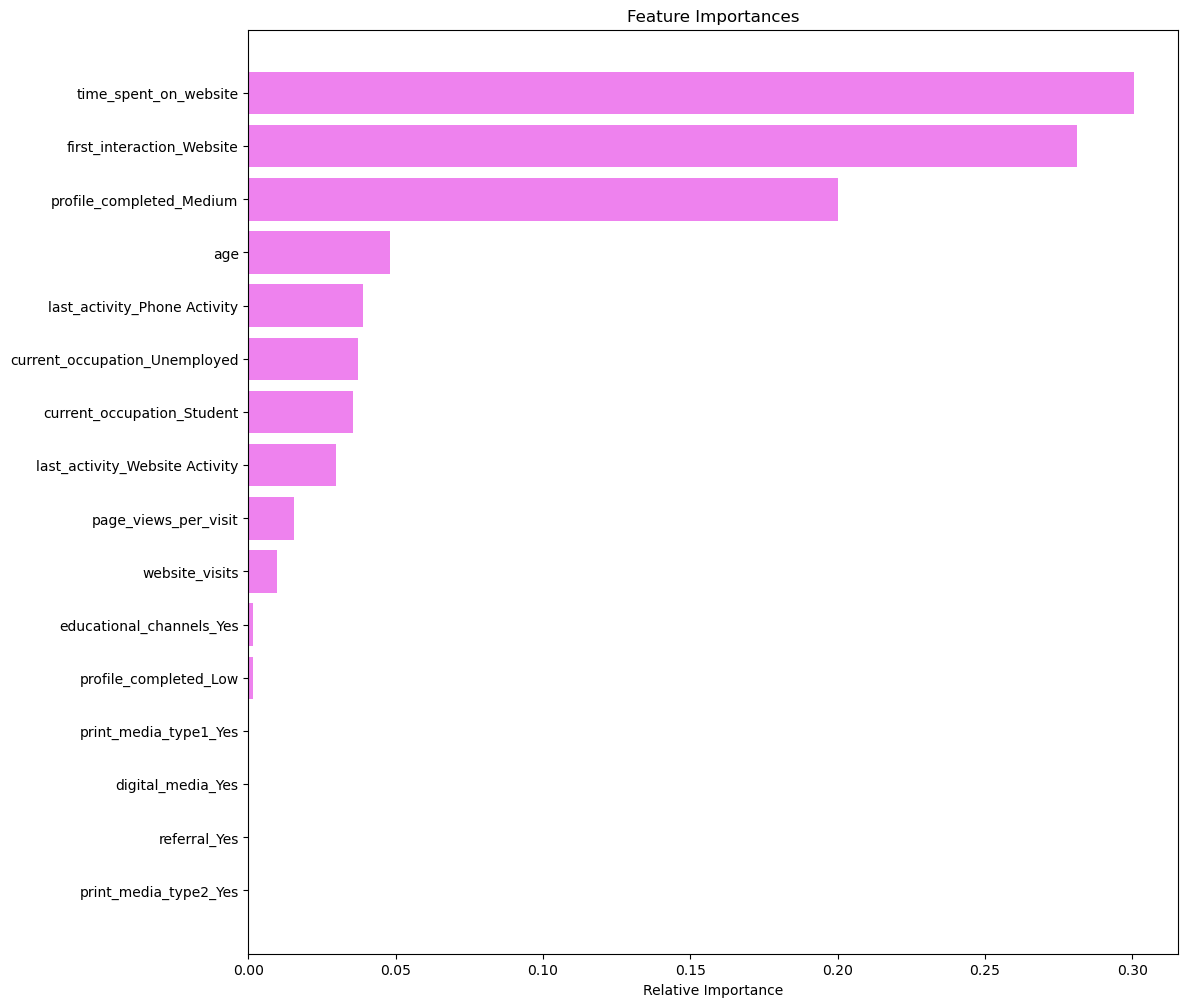

In [44]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()